AAAB


<IPython.core.display.Javascript object>


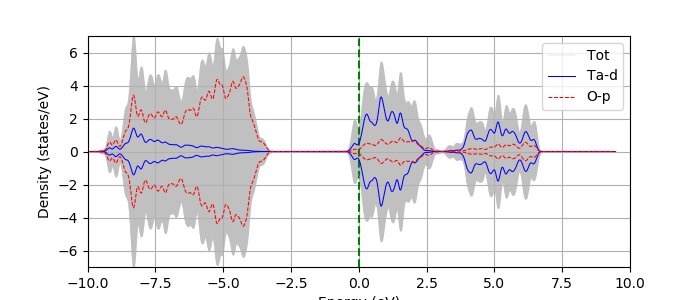

AAB


<IPython.core.display.Javascript object>


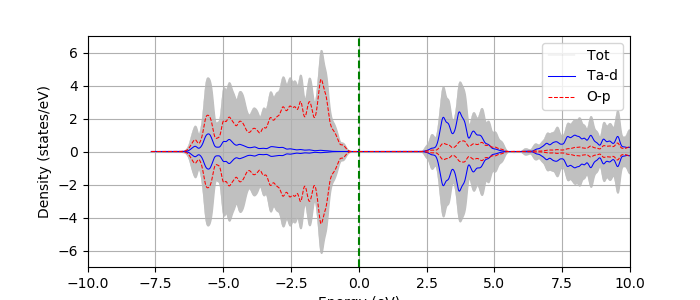

AB


<IPython.core.display.Javascript object>


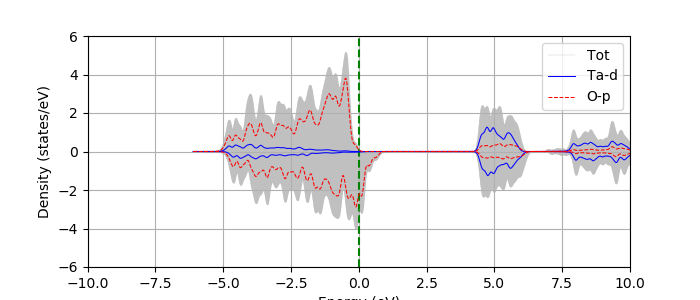

AABB


<IPython.core.display.Javascript object>


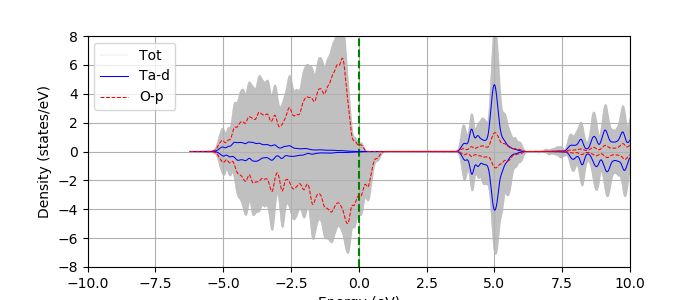

In [23]:
import matplotlib.pyplot as plt
import scipy
import numpy as np
%matplotlib notebook
### Plot eDOS from .dat file ###

#### SETTINGS ##############################################################
DATA_LOC_ROOT = 'dos_'
DIR_LS = ['AAAB', 'AAB', 'AB', 'AABB']
SUFFIX = 'Ta-d_O-p_spinpol'#['d0'],['d025'],['d05'],['d075'],['d1']]
FILETYPE = '.dat'

YLIMS = [[-7,7],[-7,7],[-6,6],[-8,8]] # per DIR in DIR_LS

SAVE_DIR = 'figures/'
SAVE_NAMES = [DATA_LOC_ROOT + elem for elem in DIR_LS]

XLIMS = [-10,10]


LABELS = ['Tot', 'Tot', 'Ta-d', 'Ta-d', 'O-p', 'O-p']
STYLES = [None,  None,  'b-',   'b-',   'r--', 'r--']

#FILL = {'Tot Down','atom-d','atom'} # these data will be filled in the plot
SPINPOL = 1

#PLOT_TITLE = 'Electronic DoS for MgTa2O6'
X_AXIS = 'Energy (eV)'
Y_AXIS = 'Density (states/eV)'
SKIP = 0   # skip total dos?
PLOT_TOT = True
NORM = 2   # number of formula units contained in poscar
##############################################################################

SKIP_OG = SKIP

## Extracting data
for i, directory in enumerate(DIR_LS):
    print(DIR_LS[i])
    fig = plt.figure(figsize=(7, 3))
    plt.axvline(x=0,color='green',linestyle='--')

    with open(directory + '/elec-dos/' + DATA_LOC_ROOT + SUFFIX + FILETYPE,'r') as file:
        data = file.read().split('\n\n')

        first = True

        for j, group in enumerate(data[SKIP:]): 
            SKIP = SKIP_OG #reset skip
            if len(group) > 10:
                pairs = group.split()
                #print(pairs)
                xs = np.array([float(x) for x in pairs[0::2]])[1:]
                ys = np.array([float(x)/NORM for x in pairs[1::2]])[1:]
                
                if first: #total up
                    plt.plot(xs,ys,linewidth=0.25,color='silver', label=LABELS[j])
                    d = scipy.zeros(ys.size)
                    plt.fill_between(xs, ys, where=ys>=d, interpolate=True, color='silver')
                    first = False
                
                elif j == 1 and SPINPOL: #total down
                    plt.plot(xs,ys,linewidth=0.25,color='silver')
                    d = scipy.zeros(ys.size)
                    plt.fill_between(xs, ys, where=ys<=d, interpolate=True, color='silver')
                
                elif j % 2 == 1: #spin down
                    plt.plot(xs, -ys, STYLES[j], linewidth=0.75) 
                
                else: #spin up
                    plt.plot(xs, ys, STYLES[j], linewidth=0.75, label=LABELS[j])    

            elif len(group) > 10 and first:
                first = False

    ## Plotting
    plt.grid(True)
    plt.xlabel(X_AXIS)
    plt.ylabel(Y_AXIS)
    plt.xlim(XLIMS)
    plt.ylim(YLIMS[i])
    #plt.ylim(bottom=0)
    plt.legend()

    plt.show()

    ## Saving plot
    fig.savefig(SAVE_DIR + SAVE_NAMES[i] + '.png',bbox_inches='tight',dpi=500)

# # Tabulating/saving table
# with open(FILE_NAME + '.txt', 'w+') as file:
#     file.write('{}\t{}'.format(labels[0],labels[1]))
#     for i in range(len(xs)):
#         file.write('\n' + str(round(xs[i],X_ROUND)) + "\t" + str(round(ys[i],Y_ROUND)))